In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [16]:
true_data = pd.read_csv('./../../processed_VideoCommentsThreatCorpus.csv')

pred_data_mistral = pd.read_csv('context_analysis_mistral_2025-03-31_16-20.csv')
pred_data_mistral_nemo = pd.read_csv('context_analysis_mistral-nemo_2025-03-31_16-42.csv')
pred_data_mistral_small = pd.read_csv('context_analysis_mistral-small_2025-03-31_17-31.csv')


In [17]:

def batch_eval(true_df: pd.DataFrame, pred_df: pd.DataFrame):
    # Ensure agent_flags values are binary integers
    pred_df['violence_label'] = pred_df['violence_label'].apply(lambda x: 0 if x in [0, 1] else 1)
    
    # Merge datasets on id and document_id
    merged_df = true_df.merge(pred_df, left_on='id', right_on='document_id', suffixes=('_true', '_pred'))

    # Convert string lists like "[0]" or "[1]" into actual integers
    merged_df['flags'] = merged_df['flags'].astype(str).str.extract(r'(\d+)').astype(int)

    # Extract true and predicted labels
    y_true = merged_df['flags']
    y_pred = merged_df['violence_label']

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    # Print results
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('\nConfusion Matrix:\n', cm)
    print('\nClassification Report:\n', report)

    # Visualization of Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Violent', 'Violent'], yticklabels=['Non-Violent', 'Violent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix [Neighbors]')
    plt.show()

    # Plot distribution of true and predicted labels
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=y_true, ax=ax[0])
    ax[0].set_title('True Label Distribution')
    ax[0].set_xticklabels(['Non-Violent', 'Violent'])

    sns.countplot(x=y_pred, ax=ax[1])
    ax[1].set_title('Predicted Label Distribution')
    ax[1].set_xticklabels(['Non-Violent', 'Violent'])

    plt.show()



Mistral
Accuracy: 0.5532
Precision: 0.8672
Recall: 0.5532
F1 Score: 0.5988

Confusion Matrix:
 [[ 91 104]
 [  1  39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.47      0.63       195
           1       0.27      0.97      0.43        40

    accuracy                           0.55       235
   macro avg       0.63      0.72      0.53       235
weighted avg       0.87      0.55      0.60       235



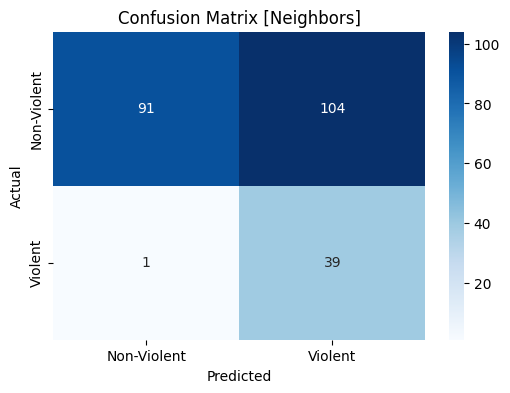

C:\Users\Elias\AppData\Local\Temp\ipykernel_15244\301317130.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
C:\Users\Elias\AppData\Local\Temp\ipykernel_15244\301317130.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


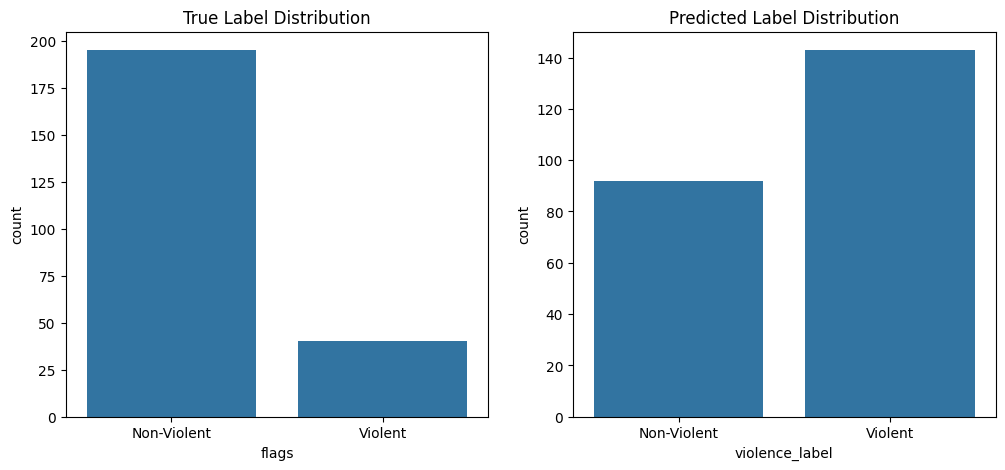

Mistral-Nemo
Accuracy: 0.7234
Precision: 0.8814
Recall: 0.7234
F1 Score: 0.7576

Confusion Matrix:
 [[132  63]
 [  2  38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.80       195
           1       0.38      0.95      0.54        40

    accuracy                           0.72       235
   macro avg       0.68      0.81      0.67       235
weighted avg       0.88      0.72      0.76       235



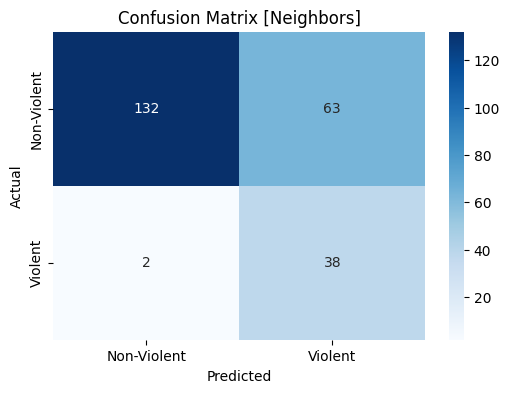

C:\Users\Elias\AppData\Local\Temp\ipykernel_15244\301317130.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
C:\Users\Elias\AppData\Local\Temp\ipykernel_15244\301317130.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


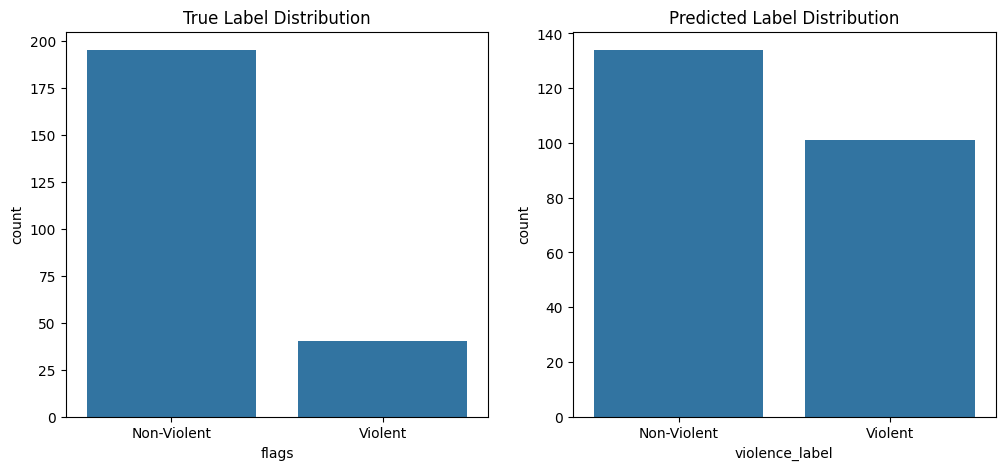

Mistral-Small
Accuracy: 0.8894
Precision: 0.8998
Recall: 0.8894
F1 Score: 0.8932

Confusion Matrix:
 [[178  17]
 [  9  31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       195
           1       0.65      0.78      0.70        40

    accuracy                           0.89       235
   macro avg       0.80      0.84      0.82       235
weighted avg       0.90      0.89      0.89       235



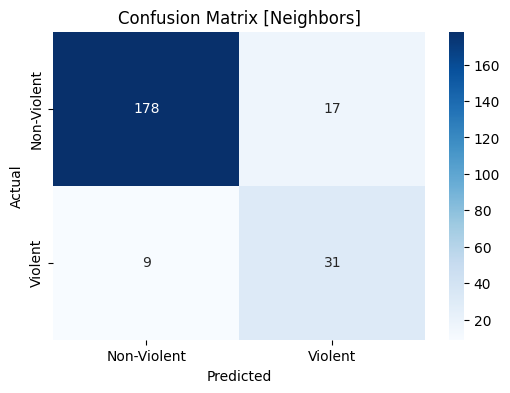

C:\Users\Elias\AppData\Local\Temp\ipykernel_15244\301317130.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
C:\Users\Elias\AppData\Local\Temp\ipykernel_15244\301317130.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


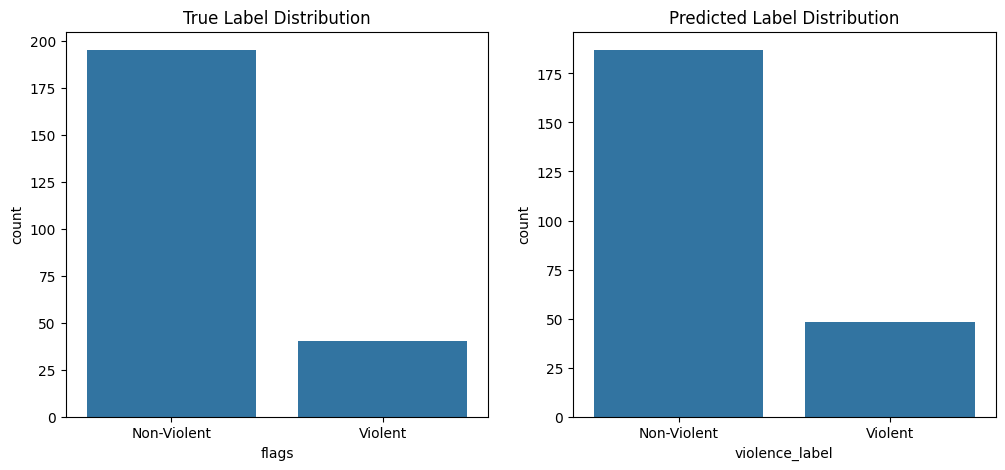

In [18]:
print("Mistral")
batch_eval(true_data, pred_data_mistral)
print("Mistral-Nemo")
batch_eval(true_data, pred_data_mistral_nemo)
print("Mistral-Small")
batch_eval(true_data, pred_data_mistral_small)

No flagged issues to plot.
No flagged issues to plot.


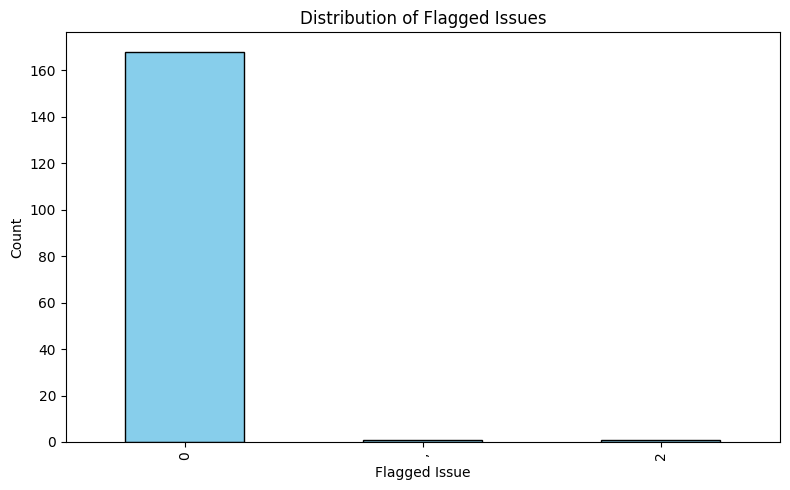

In [19]:
pred_data_div = [pred_data_mistral, pred_data_mistral_nemo, pred_data_mistral_small]

for pred_data in pred_data_div:
    
    # Ensure flagged_issues is interpreted as lists
    # pred_data["flagged_issues"] = pred_data["flagged_issues"].apply(eval)

    # Flatten the flagged issues into a single list
    all_flags = [item for sublist in pred_data["flagged_issues"] for item in sublist]

    all_flags = [item.strip("[]'\" ") for item in all_flags if item.strip("[]'\" ") not in ["", "[", "]"]]

    # Count occurrences of each flag
    flag_counts = pd.Series(all_flags).value_counts()
  
    if not flag_counts.empty:
        plt.figure(figsize=(8, 5))
        flag_counts.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title("Distribution of Flagged Issues")
        plt.xlabel("Flagged Issue")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print("No flagged issues to plot.")